In [1]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
#Building XG Boost Model
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('../input/datasetdff/df2.csv')
df.head()

Unnamed: 0            cc_num                            merchant  \
0           0  2703186189652095          fraud_Rippin, Kub and Mann   
1           1      630423337322     fraud_Heller, Gutmann and Zieme   
2           2    38859492057661                fraud_Lind-Buckridge   
3           3  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4           4   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... week_Tuesday  \
0                561 Perry Cove  Moravian Falls  ...            1   
1  43039 Riley Greens Suite 393          Orient  ...            1   
2      594 White Dale Suite 530      Malad City  ...            1   
3   9443 Cynthia Court Apt. 038         Boulder  ...            1   
4              408 Bradley Rest        Doe Hill  ...            1   

   week_Wednesday        dist  val_for_agg  trans_date hist_trans_60d  \
0               0   78.597568            1  2019-01-01            1.0   
1               0   30.212176            1  2019-01-01            1.0   
2               0  108.206083            1  2019-01-01            8.0   
3               0   95.673231            1  2019-01-01            1.0   
4               0   77.556744            1  2019-01-01            1.0   

  hist_trans_24h  hist_fraud_trans_24h  hist_fraud_trans_2h  \
0            5.0                   0.0                  0.0   
1            2.0                   0.0                  0.0   
2            5.0                   0.0                  0.0   
3            6.0                   0.0                  0.0   
4            4.0                   0.0                  0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.737903  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 52 columns]

In [3]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [4]:
x=df[X_cols]
y=df[Y_cols]

In [5]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df[df['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df[df['is_fraud'] == 1]
df2_class_nonfraud = df[df['is_fraud'] == 0]

In [6]:
#OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1289209
1    1289209
Name: is_fraud, dtype: int64


In [7]:
X=df2_oversampled[X_cols]
y=df2_oversampled[Y_cols]

In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

## Decision Tree Classifier

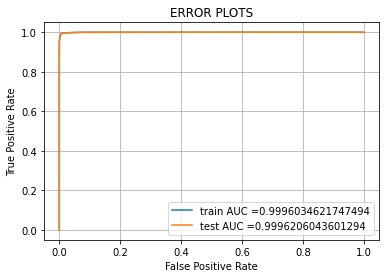

In [9]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clfV1=DecisionTreeClassifier(class_weight = 'balanced',max_depth=10,min_samples_split=500)
clfV1.fit(X_train, y_train)
y_train_pred1 = clfV1.predict_proba(X_train) [:,1]
y_test_pred1 = clfV1.predict_proba(X_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.grid(True)
plt.show()

## Random Forest Classifier

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


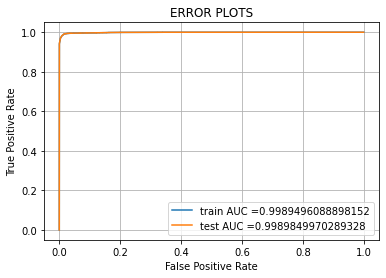

In [10]:
clfV1=RandomForestClassifier(class_weight = 'balanced',max_depth=10,min_samples_split=500)
clfV1.fit(X_train, y_train)
y_train_pred1 = clfV1.predict_proba(X_train) [:,1]
y_test_pred1 = clfV1.predict_proba(X_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.grid(True)
plt.show()

## Logistic Regression

In [12]:
params = {"C": np.logspace(-4, 4, 3),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.9min finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters: {'C': 1.0, 'solver': 'liblinear'}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NameError: name 'print_score' is not defined

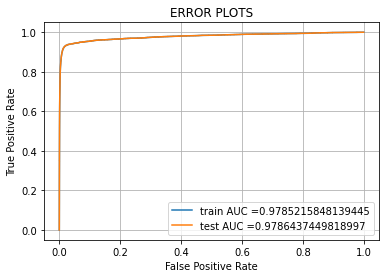

In [13]:
y_train_pred1 = lr_clf.predict_proba(X_train) [:,1]
y_test_pred1 = lr_clf.predict_proba(X_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.grid(True)
plt.show()

## XGBClassifier

In [16]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [10],
              'learning_rate': [0.1],
              'max_depth': [4, 3],
              'min_samples_leaf': [4,3],
              'max_features': [0.3, 0.2] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=4, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:  5.6min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[05:07:33] WARNING: ../src/learner.cc:573: 
Parameters: { "loss", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:07:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...e,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

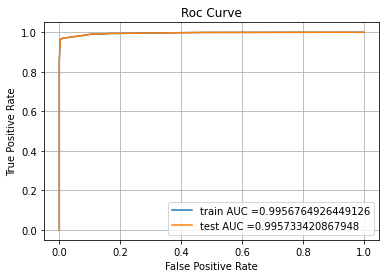

In [18]:
y_train_pred1 = modelf.predict_proba(X_train) [:,1]
y_test_pred1 = modelf.predict_proba(X_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.grid(True)
plt.show()